# **Review Rating Prediction**

## Introduction

### Motivation
As the rising of E-commerce, the customer reviews become more and more important. When we want to watch a movie, buy a cloth or eat at somewhere, we always turn to the websites and look for other's reviews and ratings. So we need pay more attention to explore the information hidden in the reveiws and ratings.

<img src = "https://github.com/spencial/CMU_15688_Team_Project/raw/master/imdb_review.png" width="600">

<img src = "https://github.com/spencial/CMU_15688_Team_Project/raw/master/imdb_no_review.png?" width="600">

However, while browsing the imdb website, we found that some people only wrote reviews but did not write ratings. When we look at these reviews, it's impossible to quickly tell what the reviewer's preference is for the movie. We also found that some reviews and ratings are not match, which means they may be fake reviews. So what we want to do with this project is through only analyzing the review text and then predict the rating. This allows us to quickly get a quantitative score when we encounter some raw review text. It also enables us to make a prediction of reviews which have rating to see whether they are reliable.

### Problem

**The problem we focus here is: while we are increasingly relying on reviews on websites, many of the reviews on websites have problems with missing ratings, fake ratings, etc., which makes it impossible for us to get real feedback from people about the products we care, thus misleading us.**

To solve this problem, we build review rating prediction, which is aiming to predict the numeric rating from the text of the user’s review. It will enable us to produce a reliable rating by the review text quickly.

Besides the problem we found, it can be applied to many other tasks:

1. Determine the rating of reviews
2. Detect suspicious reviews where reviews and ratings do not match
3. Help better understand reviewers’ sentiment
4. Help website developers improve their review system

### How to solve

To solve the review rating prediction problem, we followed these steps:

1. Scraping data: get review data from IMDb, Amazon and Yelp
2. Data preprocessing: normalize and handle punctuation
3. Data visualization: wordcloud and LDA
4. Modeling and Evaluation

## Install packages
Besides python packages, you need the following plugins/libraries for data scraping:
   * PhantomJS: a headless browser for automation browsing.
     * In MacOS, you can run `brew cask install phantomjs`. 
     * In Windows, you can download the phantomjs at `https://phantomjs.org/download.html` and put the `phantomjs.exe` into system path.

In [1]:
!pip install selenium
!pip install wordcloud
!pip install gensim
!pip install beautifulsoup4
!pip install seaborn
!pip install lxml
!pip install nltk
!pip install pandas
!pip install numpy
!pip install scikit-learn==0.22

  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
     |████████████████████████████████| 133kB 369kB/s eta 0:00:01
     |████████████████████████████████| 163kB 316kB/s eta 0:00:01
     |████████████████████████████████| 13.2MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 15.1MB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 3.9MB 4.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 71kB 17.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonho

     |████████████████████████████████| 10.2MB 5.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/08/7f/981b9f4dc4f1926f9cbacbf61cba0f93ac7f466eeb62c0221b299fc5fe4f/lxml-4.4.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Processing /Users/spencer/Library/Caches/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483/nltk-3.4.5-cp37-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b1/db/102a43a72afd2b0938ca039af6047e2a2bf5e5d5eb1bbe38ce616e2d750d/scikit_learn-0.22-cp37-cp37m-macosx_10_6_intel.whl
     |████████████████████████████████| 296kB 2.1MB/s eta 0:00:01


In [2]:
import csv
import re
import nltk
import sklearn
import random
import pickle
import urllib3
import requests
import time
import json
import io
import collections
import string
import gensim
import seaborn
import pickle

import numpy as np
import pandas as pd

import sklearn.model_selection
import sklearn.naive_bayes
import sklearn.metrics
import urllib.request
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from lxml import html
from wordcloud import WordCloud, STOPWORDS
from pprint import pprint
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/spencer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/spencer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data Scraping

We scraped three websites: IMDB, Amazon and Yelp to build our datasets.
All the raw dataset from data scraping and shuffled dataset are on [github](https://github.com/spencial/CMU_15688_Team_Project).

**Attention: All the code cells in this section will take long time(over 2 hr) to run**

### Data Scraping on IMDB

Since websites like IMDB needs people to click the load more button to see more reviews, besides using beautifulsoup, we used the automated website framework (selenium) and headless browser (phantomjs) to simulate action of clicking button during scraping.
We firstly got top 100 movies from `https://www.imdb.com/chart/moviemeter` and then gathered up to 500 reviews from every movie. We finally got 27534 reviews in total from IMDB website.

<img src = "https://github.com/spencial/CMU_15688_Team_Project/raw/master/imdb_load_more.png" width="600">

To get the review for a particular movie, we firstly used code to simulate clicking the load more button for up to 20 times and then we walk through the whole website for that movie and parsed the reviews. To make sure that we will not be blocked by the website, we will pause the thread for 1s everytime we clicked the load more button. 

In [ ]:
driver = webdriver.PhantomJS()

def get_reviewes(movie):
    test_url = f"https://www.imdb.com/title/{movie}/reviews"
    print(f"crawl {test_url}")
    driver.get(test_url)
    click_count = 1
    
#   Simulate clicking buttons
    while True:
        try:
            loadmore = driver.find_element_by_id("load-more-trigger")
            print("Click load more button...")
#             Click buttons for up to 20 times for each movie
            if click_count < 20 and loadmore:
                loadmore.click()
                click_count += 1
            else:
                break
            time.sleep(1)
        except Exception as e:
#             Exceptions are thrown when the webpage does not have click buttons (no more reviews to be displayed)
            print(e)
            break
# Parse page and find reviews
    soup = BeautifulSoup(driver.page_source)
    reviews = soup.find_all('div', class_=['imdb-user-review'])
    review_list = []
    for review in reviews:
        try:
            review_star = int(review.find('span', class_=['rating-other-user-rating']).find('span').getText())
            review_content = review.find('div', class_=["text", "show-more__control"]).getText()
            review_list.append([review_star, review_content])
        except Exception as e:
            print(e)
    return review_list

def write_to_csv(reviews, result_file):
    with open(result_file, mode='a') as review_file:
        writer = csv.writer(review_file, delimiter=',',
                                     quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for review in reviews:
            writer.writerow(review)


def get_movies(url):
    driver.get(url)
    soup = BeautifulSoup(driver.page_source,features="html.parser")
    titleCols = soup.find_all('td', class_=['titleColumn'])
    movies = []
    for titleCol in titleCols:
        link = titleCol.find('a', href=True)['href']
        movies.append(link.split('/')[2])

    return movies

In [ ]:
result_file = 'imdb_review.csv'
with open(result_file, mode='w') as review_file:
    writer = csv.writer(review_file, delimiter=',',
                                 quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['review_rating', 'review_content'])

# popular movie chart
for movie in get_movies("https://www.imdb.com/chart/moviemeter"):
    reviews = get_reviewes(movie)
    write_to_csv(reviews, result_file)

<img src ="https://github.com/spencial/CMU_15688_Team_Project/raw/master/imdb_scraper_output.png">

### Data Scraping on Amazon

This script is used to gather reviews and ratings from Amazon website for specfic product.

In this section, we scraped over different department: Camera & Photo, Electronics, Clothing, Shoe & Jewelry, Grocery & Gourmet Food etc. It ensured that our reviews do not focus on narrow field, but get sampled under compound fields.

In [ ]:
# Clean the format of variable ;number_review'
def number_review_cleaner(str):
    cleaned = re.search('of (.*) reviews',str)
    cleaned = cleaned.group(1).replace(',','')
    return cleaned

# parse json info into csv file named '[ASIN].csv'
def json_parser(name,json,cutoff_number):
    with open('amazon_review.csv', mode='a+',newline='') as outfile:
        writer = csv.writer(outfile,delimiter=',')
        counter= 0
        for data in json['reviews']:
            writer.writerow(data.values())
            counter += 1
    print('FINISH WRITING DATA INTO CSV FILE')
    print('NAME OF THE PRODUCT:',json['product_name'])
    print('CUTOFF NUMBER OF COMMENTS:',cutoff_number)
    print('NUMBER OF REVIEWS:',counter)

'''
reference:

https://github.com/DavidRoldan523/amazon_reviews_allpages/blob/master/scraper_amazon_threading_version.py
'''

def user_agent_random():
    list_user_agent = ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.80 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36'
                       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36'
                       'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36',
                       'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.67 Safari/537.36']
    return random.choice(list_user_agent)

In [80]:
'''
Amazon Standard Identification Numbers (ASINs) are unique blocks of 10 letters and/or numbers that identify items. 
You can find the ASIN on the item's product information page on Amazon website. 
In our project, a list of ASIN is selected manually among multiple popular product across different categories. 
Cutoff number is used to filter comments out with few words. 
Its value is picked manually as well, which is likely to influence the contribution of each comments. 

Requests module was utilized to access the website and receive response. 
Then lxml module was used to read response out with HTML format to extract specific information such as product name and the number of reviews, which required us to observe the HTML tag carefully. 
The pattern of the review page was caught to form a list of urls for all pages of reviews. Reviews and ratings were written in CSV file with csv module.
'''

'''
Amazon scraper Ver 1.0

Use ASIN to download reviews and rating scores

reference:
1. https://github.com/DavidRoldan523/amazon_reviews_allpages/blob/master/scraper_amazon_threading_version.py
2. https://medium.com/@tusharseth93/scraping-the-web-a-fast-and-simple-way-to-scrape-amazon-b3d6d74d649f
'''

def get_reviews_ratings(asin,cutoff_number=0):
    # The final result including name and reviews text
    product_info = {}
    # List of reviews
    all_reviews = []
    try:
        # direct to the review page
        amazon_url = 'https://www.amazon.com/product-reviews/' \
                      + asin \
                      + '/ref=cm_cr_arp_d_paging_btm_next_1?pageNumber=1'
        # user agent
        # headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", 
        headers = {"User-Agent": user_agent_random(), 
                    "Accept-Encoding":"gzip, deflate",     
                    "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
                    "DNT":"1",
                    "Connection":"close", 
                    "Upgrade-Insecure-Requests":"1"}
        urllib3.disable_warnings()
        response = requests.get(amazon_url,headers=headers,verify=False,timeout=30)
        time.sleep(1)
        cleaned_response = response.text.replace('\x00','')
        html_response = html.fromstring(cleaned_response)

        # name of the product
        product_name = ''.join(html_response.xpath('.//a[@data-hook="product-link"]//text()')).strip()
        product_info['product_name'] = product_name
        # get the total pages of reviews
        number_reviews = ''.join(html_response.xpath('.//span[@data-hook="cr-filter-info-review-count"]//text()')).replace(',', '')
        pages_reviews = int(int(number_review_cleaner(number_reviews))/10)
        # promise the number of pages is correct
        if pages_reviews %2 == 0:
            pages_reviews += 1
        else:
            pages_reviews += 2

        # gather the urls to each page of reviews
        counter_5stars = 0
        for page in range(1, pages_reviews):
            print(f'Request the reviews in page {page}')
            url = 'https://www.amazon.com/product-reviews/' + \
                     asin + \
                     '/ref=cm_cr_arp_d_paging_btm_next_' + \
                     str(page) + \
                     '?pageNumber=' + \
                     str(page)

            page_response = requests.get(url,headers=headers,verify=False,timeout=20)
            time.sleep(1)
            cleaned_page_response = page_response.text.replace('\x00','')
            html_page_response = html.fromstring(cleaned_page_response)
            reviews = html_page_response.xpath('//div[contains(@id,"reviews-summary")]')
        
            if not reviews:
                reviews = html_page_response.xpath('//div[@data-hook="review"]')
            
            for review in reviews:
                # rating
                raw_review_rating = review.xpath('.//i[@data-hook="review-star-rating"]//text()')
                review_rating = ''.join(raw_review_rating).replace('out of 5 stars','')
                # skip condition
                if counter_5stars >= 5000 and int(float(review_rating))==5:
                    continue
                # comments
                raw_review_content1 = review.xpath('.//span[@data-hook="review-body"]//text()')
                raw_review_content2 = review.xpath('.//div//span[@data-action="columnbalancing-showfullreview"]/@data-columnbalancing-showfullreview')
                raw_review_content3 = review.xpath('.//div[contains(@id,"dpReviews")]/div/text()')

                # cleaning data
                review_content = ' '.join(' '.join(raw_review_content1).split())
                if not review_content:
                    continue
                    
                # hidden reviews
                if raw_review_content2:
                    review_content_2 = json.loads(raw_review_text2[0])
                    review_content_2 = review_content_2['rest']
                    cleaned_review_content_2 = re.sub('<.*?>', '', review_content_2)
                    full_review_content = review_content + cleaned_review_content_2
                else:
                    full_review_content = review_content
                
                # if review 1 not exist
                if not raw_review_content1:
                    full_review_content = ' '.join(' '.join(raw_review_content3).split())

                
                if len(full_review_content.split()) < cutoff_number:
                    continue
                else:
                    review_dict = {
                        'review_rating':int(float(review_rating)),
                        'review_text':full_review_content
                    }
                    all_reviews.append(review_dict)

                    if int(float(review_rating)) == 5:
                        counter_5stars += 1
            product_info['reviews'] = all_reviews
        return product_info,cutoff_number
    except Exception as e:
        return None,None
    
# Given a list of ASIN number, generate csv file including reviews
def Amazon_scraper(asin_list,cutoff_number):
    for asin in asin_list:
        print('Downloading reviews and ratings for:', asin)
        reviews, cutoff_number = get_reviews_ratings(asin,cutoff_number=cutoff_number)
        json_parser(asin,reviews,cutoff_number)

In [ ]:
with open('amazon_review.csv', mode='a+',newline='') as outfile:
        writer = csv.writer(outfile,delimiter=',')
        writer.writerow(['rating', 'review_content'])

asin_list = ['B01L8JJ1GK', 'B075CYMYK6', 'B078HQBS21', 'B002NZJ4L6', 'B00KWR6G4A', 'B074CR89QG', 'B00VGR4YDU', 'B012YAV43A', 'B00P0YQYYW']
Amazon_scraper(asin_list,0)

<img src ="https://github.com/spencial/CMU_15688_Team_Project/raw/master/amazon_scraper.jpg">

### Data Scraping on Yelp


We scraped 20k+ review and rating data from Yelp. The data set contains a wide range of restaurants ranging from French, Italian, Japanese, and Chinese to restaurants with lower (1,2) overall rating and restaurants with higher (4,5) overall rating. 

In random selection, we observed that Yelp has far more higher rating reviews than lower rating reviews. In order to ensure the balance and quality of the rating data, we extracted the first 400 reviews in desending order of rating per restaurant.

What's more, 5000+ reviews with lower ratings are particularly selected from 10 restaurants regarded as "The worst restaurants in the U.S." to better balance the data set. As more lower rating (1,2) data were added to review data, our dataset now contains balanced amount of stars, equally ranging from 1 to 5.

To run the following code, you should obtain the Yelp API by creating an app at https://www.yelp.com/developers/v3/manage_app. 

Reference: some of the code below are cited from our 15688 homework 1.

In [ ]:
#Extract low-rating restaurants from "The Worst Restaurants in the U.S."
open_url = urllib.request.urlopen("https://www.yelp.com/collection/1sSe82mEC_fHMXiDKzcCVQ")
time.sleep(0.5)
soup = BeautifulSoup(open_url, "html.parser")
low_rating_list = []
for url in soup.findAll('a',{'class':'biz-name js-analytics-click'},href=True):
    low_rating_list.append("https://www.yelp.com" + url['href'])

In [ ]:
#Extract restaurants from Pittsburgh sorting by rating
In the following code, we used Yelp API (Obtained by creating an app on Yelp's Developers site) to extract review data from its website. 
def all_restaurants(api_key, query):
    limit = 20
    offset = 0
    urls = []
    while True :
        payload = {'location':query, 'limit': limit, 'offset': offset, 'categories': 'restaurants'}
        headers = {'Authorization':'Bearer '+api_key}
        r = requests.get('https://api.yelp.com/v3/businesses/search', headers = headers, params = payload)
        print(f'get requests with payload {payload}')
        data = json.loads(r.text)
        if 'total' not in data or data['total'] == 0:
            break
        for business in data['businesses']:
            urls.append(business['url'].split('?adjust_creative')[0])
        offset += limit
        time.sleep(1)
    return urls

In [ ]:
driver = webdriver.PhantomJS()

def extract_reviews(url):
    print(f"crawl {url}?{suffix_url}")
    driver.get(url+'?'+suffix_url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    divs = soup.find_all('div',itemprop = "review", itemtype="http://schema.org/Review")
    reviews = []
    for div in divs:
        try:    
            rating=float(div.find('meta', itemprop="ratingValue")['content'])     
            description=div.find('p', itemprop="description").get_text().strip()
            reviews.append([rating, description])
        except Exception as e:
            print(e)

    num_pages = min(int(soup.find('div', attrs={'aria-label':"Pagination navigation"}).div.get_text()[-2:]), 20)
    num_review_per_page = len(reviews)
    for num_page in range(1, num_pages):
        time.sleep(0.5)
        driver.get(url+f"?start={num_review_per_page*num_page}&{suffix_url}")
        print(f"crawl {url}?start={num_review_per_page*num_page}&{suffix_url}")
        soup = BeautifulSoup(driver.page_source, "html.parser")
        divs = soup.find_all('div',itemprop = "review", itemtype="http://schema.org/Review")
        for div in divs:
            try:
                rating = float(div.find('meta', itemprop="ratingValue")['content'])
               
                description = div.find('p', itemprop="description").get_text().strip()
                reviews.append([rating,  description])
            except Exception as e:
                print(e)
    return reviews

In [ ]:
def write_to_csv(reviews):
    with open('yelp_review_pittsburgh.csv', mode='a') as review_file:
        writer = csv.writer(review_file, delimiter=',',
                                     quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for review in reviews:
            writer.writerow(review)

In [ ]:
'''
Lower rating restaurants' URLs and Pittsburgh restaurants' URLs are extracted from Yelp's website. 
Those URLs are used to scrap the review and rating data in the function extract_reviews. 
Finally, reviews and rating data were written in CSV file with csv module. 
'''
suffix_url = 'sort_by=rating_asc'
with open('yelp_review_pittsburgh.csv', mode='w') as review_file:
    writer = csv.writer(review_file, delimiter=',',quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['rating', 'review_content']) 

    yelp_rest_url = 'yelp_rest_urls.pkl'
    if os.path.exists(yelp_rest_url):
        with open(yelp_rest_url, 'rb') as f:
            urls = pickle.load(f)
    else:
        API_KEY = ""
        urls = all_restaurants(API_KEY, 'Pittsburgh')
        total_url = low_rating_list + urls
        with open(yelp_rest_url, 'wb') as f:
            pickle.dump(urls, f)

    for url in total_url[:400]:
        reviews = extract_reviews(url)
        write_to_csv(reviews)

<img src ="https://github.com/spencial/CMU_15688_Team_Project/raw/master/yelp_scraper.png">

### Shuffle and Clean Scraper Data

Shuffled the dataset to reduce variance and make the model more general. We scraped the reviews for each product, so shuffling is applied to make the dataset random and ensure our training/validation/test sets are representative over the data's distribution.

In [ ]:
def shuffle_csv(file_name, star_map = None):
    df = pd.read_csv(file_name)
    if star_map:
        df['rating'] = df.apply(lambda row: star_map[row['rating']], axis = 1)
    else:
        df['rating'] = df.apply(lambda row: row['rating'], axis = 1)
    df.head()
    df[['review_content','rating']].to_csv(f'shuffle_{file_name}',sep=',', encoding='utf-8', index = False)

In the IMDB, the scale of rating of movie review is from 1 to 10. To make it consistent with the yelp and amazon dataset, we map the 1 to 10 star rating to 1 to 5 scale.

In [ ]:
star_map = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5}
shuffle_csv('imdb_review.csv', star_map)
shuffle_csv('amazon_review.csv')
shuffle_csv('yelp_review.csv')

## Preprocess data

In this section, we want to process and tokenize raw review contents. It contains following steps: 
1. Lowercasing all review text data. 
2. Not changing the order of each word in the sentence.
3. Lemmatizing the data into a common base form.
4. Only containing numbers and digits characters.
5. Removing stopwords and rare words.

Here, **stopwords** means the words appeared very commonly in a language, such as "and", "a", which are not useful for our problem. So we applied NLTK's list of English stopwords which was removed from our review text. **Rare words** are the words only appeared once in our dataset, which are also considered not helpful.

We also plot a histgram to show the distribution of the appearance number of words.

Reference: some of the code below are cited from our 15688 homework 3.

### Text processing


Normalizes case and handles punctuation.

In [4]:
def read_data(file_name, columns =['review_content', 'rating'] ):
    df = pd.read_csv(file_name)
    data = df[columns].values.tolist()
    train_data, val_data = sklearn.model_selection.train_test_split(data, shuffle=False, train_size=0.9)
    return train_data, val_data

In [5]:
imdb_train_data, imdb_val_data = read_data('shuffle_imdb_review.csv')

### Remove stopwords
1. Set and remove stopwords.
2. Map ten-stars rating standard into five-stars.

In [6]:
def preprocess(text, stopwords={}, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    text = re.sub(r"\'s?", '', text.lower())
    text = re.sub(r'https?:\/\/t\.co\/[a-zA-Z0-9]{10}', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    
    words = nltk.word_tokenize(text)
    res = []
    for word in words:
        word = lemmatizer.lemmatize(word)
        if word in stopwords:
            continue
        res.append(word)
        
    return res


def preprocess_data(train_data, val_data, extra_stopwords=set()):
    stopwords = set(nltk.corpus.stopwords.words('english')) | set(["http", "co", "rt", "amp"]) | extra_stopwords
    train, val = [], []
    for i in range(len(train_data)):
        train.append([preprocess(train_data[i][0], stopwords), train_data[i][1]])
                                    
    for i in range(len(val_data)):
        val.append([preprocess(val_data[i][0], stopwords), val_data[i][1]])
                                      
    return train, val

In [7]:
imdb_train_set, imdb_val_set = preprocess_data(imdb_train_data, imdb_val_data)

### Plot histogram 

Log-scaled histogram is plotted to show the distribution of the appearance frequency of words in dataset.

In [8]:
def get_distribution(data_train):
    counter = collections.defaultdict(lambda: 0)
    for data in data_train:
        for word in data[0]:
            counter[word] +=1
    return counter

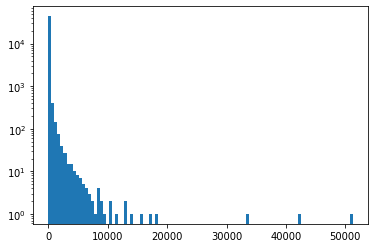

In [9]:
imdb_dist = get_distribution(imdb_train_set)
plt.hist(imdb_dist.values(), bins=100)
plt.yscale('log')

### Remove rare words

We selected the words which only appear once in the dataset as rare words and removed from our data. It enables to improve the efficiency and precision of our models.

In [10]:
def get_rare_words(dist):
    rare_words = set()
    dist = dict(dist)
    for word in dist.keys():
        if dist.get(word) == 1:
            rare_words.add(word)
    return rare_words

In [11]:
imdb_rare_words = get_rare_words(imdb_dist)
imdb_train_set, imdb_val_set = preprocess_data(imdb_train_data, imdb_val_data, imdb_rare_words)

### Create features

We creates the feature and label for training and validation sets.

In [12]:
def do_nothing(x):
    return x

def create_features(train_data, val_data):
    tfidf = sklearn.feature_extraction.text.TfidfVectorizer(
        analyzer='word',
        tokenizer=do_nothing,
        preprocessor=do_nothing,
        token_pattern=None
    )
    train_words = [data[0] for data in train_data]
    train_labels = np.array([data[1] for data in train_data])
    val_words = [data[0] for data in val_data]
    val_labels = np.array([data[1] for data in val_data])
    tfidf.fit(train_words)
    train_features = tfidf.transform(train_words)
    val_features = tfidf.transform(val_words)

    return (train_features, train_labels, val_features, val_labels)

In [13]:
imdb_train_features, imdb_train_labels, imdb_val_features, imdb_val_labels = create_features(imdb_train_set, imdb_val_set)

In [14]:
amazon_train_data, amazon_val_data = read_data('shuffle_amazon_review.csv')
amazon_train_set, amazon_val_set = preprocess_data(amazon_train_data, amazon_val_data)
amazon_dist = get_distribution(amazon_train_set)
amazon_rare_words = get_rare_words(amazon_dist)
amazon_train_set, amazon_val_set = preprocess_data(amazon_train_data, amazon_val_data, amazon_rare_words)
amazon_train_features, amazon_train_labels, amazon_val_features, amazon_val_labels = create_features(amazon_train_set, amazon_val_set)

In [15]:
yelp_train_data, yelp_val_data = read_data('shuffle_yelp_review.csv')
yelp_train_set, yelp_val_set = preprocess_data(yelp_train_data, yelp_val_data)
yelp_dist = get_distribution(yelp_train_set)
yelp_rare_words = get_rare_words(yelp_dist)
yelp_train_set, yelp_val_set = preprocess_data(yelp_train_data, yelp_val_data, yelp_rare_words)
yelp_train_features, yelp_train_labels, yelp_val_features, yelp_val_labels = create_features(yelp_train_set, yelp_val_set)

## Data Visualization

Through data visualization, we can represent some information in the data set in different forms. We can find the most frequent words through word cloud, and also find the words that have a greater impact on the model, so as to have a more intuitive understanding of the distribution of the data set.

### WordCloud

Wordcloud is a data visualization tool which can represent text data in which the size of each word indicates its frequency or importance.

In [16]:
def draw_cloud(text,max_words=20,width=1000,height=800):
    """Draw wordcloud plot
    args:
        text:str, preprocessed text
        max_words: int, maximum number of words in plot
        width, height: int, size of the plot
    """
    wordcloud = WordCloud(
        background_color="white",
        width=width,
        height=height,
        max_words=max_words
    ).generate(text)

    plt.imshow(wordcloud)
    plt.axis('off')

### Wordcloud of top N words for movie ID

Generate the wordcloud plot for the top N words appearing in the reviews based on movie ID. Here, we selected the plot to show the top 50 words.

In [17]:
def draw_cloud_exe(train, val):
    allWords = []
    allRating = []

    for i in train:
        allWords += i[0]
        allRating.append(i[1])
    for i in val:
        allWords += i[0]
        allRating.append(i[1])

    allWordsString = ' '.join(allWords)
    draw_cloud(allWordsString,max_words=50)

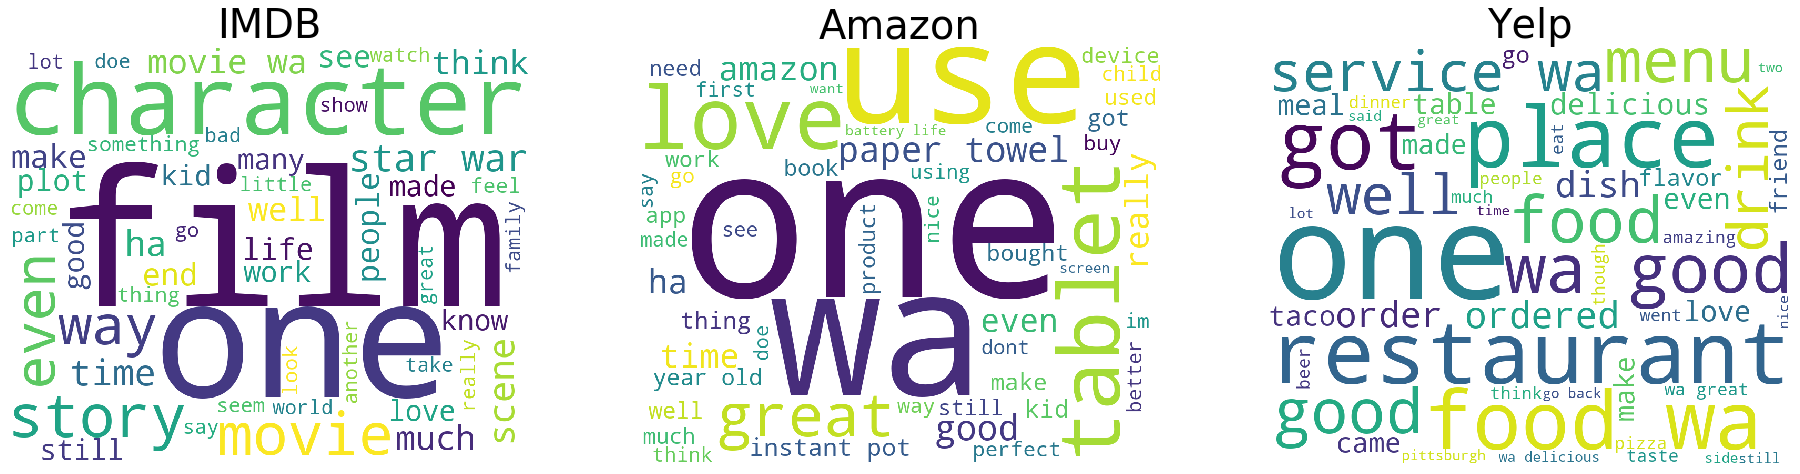

In [18]:
fig = plt.figure(figsize=(32,8))

plt.subplot(1, 3, 1).set_title('IMDB', fontsize=40)
draw_cloud_exe(imdb_train_set, imdb_val_set)

plt.subplot(1, 3, 2).set_title('Amazon', fontsize=40)
draw_cloud_exe(amazon_train_set, amazon_val_set)

plt.subplot(1, 3, 3).set_title('Yelp', fontsize=40)
draw_cloud_exe(yelp_train_set, yelp_val_set)

plt.show()

### Distribution of the length of reviews

In [19]:
def review_length_distribution(filename):
    df = pd.read_csv(filename)
    lengthList = [i.count(" ") + 1 for i in df['review_content']]
    lengthList = pd.Series(lengthList)
    plt.hist(lengthList, bins=30, histtype='bar', normed=True)
    plt.xlim(0,400)
    plt.xlabel('Length of reviews')
    plt.ylabel('Distribution')
    plt.title('Distribution of length of reviews')
    
    seaborn.kdeplot(lengthList)

/Users/spencer/anaconda3/envs/project/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


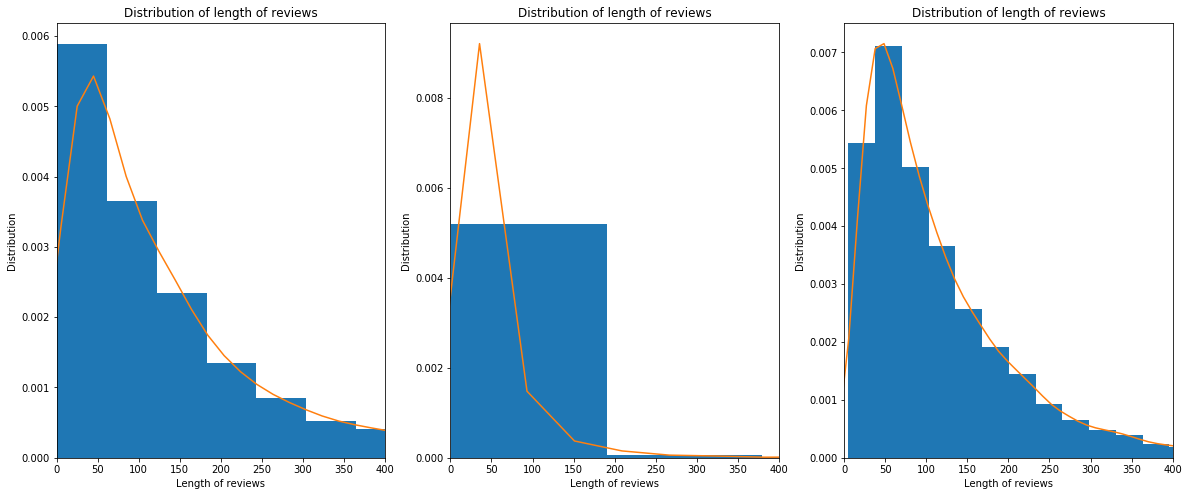

In [20]:
fig = plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1).set_title('IMDB', fontsize=40)
review_length_distribution('shuffle_imdb_review.csv')

plt.subplot(1, 3, 2).set_title('Amazon', fontsize=40)
review_length_distribution('shuffle_amazon_review.csv')

plt.subplot(1, 3, 3).set_title('Yelp', fontsize=40)
review_length_distribution('shuffle_yelp_review.csv')

plt.show()

### Distribution of rating scores

We plotted a histogram of the rating scores. From the plot, we can see that

In [23]:
def show_class_distribution(filename):
    df = pd.read_csv(filename)
    rating_groups = df.groupby(df['rating'])['rating']
    rating_groups.hist(bins = 3)
    print(rating_groups.count())
    print(f"total: {rating_groups.count().values.sum()}")

rating
1     5935
2     2736
3     3029
4     5477
5    10357
Name: rating, dtype: int64
total: 27534
rating
1     5382
2     1810
3     2404
4     4375
5    23678
Name: rating, dtype: int64
total: 37649
rating
1    1870
2    2147
3    3933
4    8698
5    7601
Name: rating, dtype: int64
total: 24249


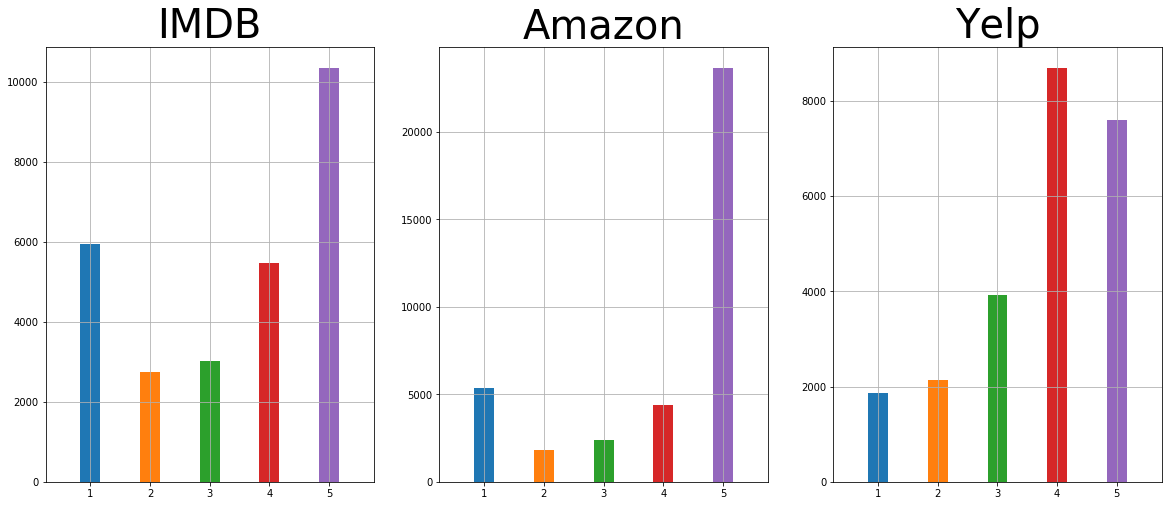

In [24]:
fig = plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1).set_title('IMDB', fontsize=40)
show_class_distribution('shuffle_imdb_review.csv')

plt.subplot(1, 3, 2).set_title('Amazon', fontsize=40)
show_class_distribution('shuffle_amazon_review.csv')

plt.subplot(1, 3, 3).set_title('Yelp', fontsize=40)
show_class_distribution('shuffle_yelp_review.csv')

plt.show()

### Word counts of keywords

LDA is an unsupervised bayesian model that can be used to identify underlying topic information in a document collection or corpus.

With the LDA model, we can find out some words appeared the most are not always meaningful, like **‘one’**, which would not benefit our model. We can remove the words which appear in high frequency but with little weight to improve the quality of datasets.

**Attention: All the code cells in this section will take long time(over 2 hr) to run**

In [ ]:
'''
For each document in the corpus, LDA defines the following generation process:
1. For each document, extract a topic from the topic distribution;
2. Extract one word from the word distribution corresponding to the topic selected above;
3. Repeat the process until you iterate over each word in the document.
Each document in the corpus with four theme a multinomial distribution, corresponding to the multinomial distribution for theta. 
Each topic in turn corresponds to a multinomial distribution of 10 words in the vocabulary, denoted as.
'''

def lda_modeling(train, val):
    data_ready = []
    for i in train:
        data_ready.append(i[0])
    for i in val:
        data_ready.append(i[0])

    id2word = corpora.Dictionary(data_ready)
    # create Corpus: Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data_ready]
    # build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=4,
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10,
                                               passes=100,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)
    return lda_model

In [ ]:
lda_model = lda_modeling(imdb_train_set, imdb_val_set)

Chose 4 topics as the number of classes for LDA model and top 10 words for each topic.

In [ ]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word,i,weight,counter[word]])
        
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i,ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

IMDB

<img src="https://github.com/spencial/CMU_15688_Team_Project/raw/master/imdb_LDA.png">

Amazon

<img src="https://github.com/spencial/CMU_15688_Team_Project/raw/master/amazon_LDA.png">

Yelp

<img src="https://github.com/spencial/CMU_15688_Team_Project/raw/master/yelp_LDA.png">

In [25]:
extra_stopwords = set(['one'])

In [26]:
imdb_train_set, imdb_val_set = preprocess_data(imdb_train_data, imdb_val_data, imdb_rare_words|extra_stopwords)
imdb_train_features, imdb_train_labels, imdb_val_features, imdb_val_labels = create_features(imdb_train_set, imdb_val_set)

In [27]:
amazon_train_set, amazon_val_set = preprocess_data(amazon_train_data, amazon_val_data, amazon_rare_words|extra_stopwords)
amazon_train_features, amazon_train_labels, amazon_val_features, amazon_val_labels = create_features(amazon_train_set, amazon_val_set)

In [28]:
yelp_train_set, yelp_val_set = preprocess_data(yelp_train_data, yelp_val_data, yelp_rare_words|extra_stopwords)
yelp_train_features, yelp_train_labels, yelp_val_features, yelp_val_labels = create_features(yelp_train_set, yelp_val_set)

# Model Training and Evaluation

## SVM

"Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification and regression problems."(Cited from [Understanding Support Vector Machine algorithm from examples](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/))  Since our project deals with a multiclass classification problem, it's reasonable to apply SVM to classify the multi-classes review and rating data.

Reasons for using SVM (linear Kernel):
1. Since our text data set is linearly separatable, it is a good choice to use SVM, especially linear Kernel. 
2. Linear kernel works well with linearly separatable data and has better performance on our dataset compared with RBF Kernel.

In [29]:
def train_svm(train_features, train_labels):
    svc = sklearn.svm.SVC(kernel = 'linear')
    svc.fit(train_features, train_labels)
    return svc

## Naive Bayes
Naive Bayes classifier is a classification algorithm based on Bayes’ theorem. The classification principle of bayes classifier is to calculate the posterior probability through prior probability and use bayes formula to select the classification result corresponding to the maximum posterior probability.

Reasons for using Naive Bayes:
1. naive bayesian model originates from classical mathematical theory and has stable classification efficiency.
2. good at small-scale data, able to handle multiple classification tasks, suitable for incremental training.
3. it is not sensitive to missing data, and the algorithm is relatively simple, which is often used for text classification.

In [30]:
def train_nb(train_features, train_labels):
    nb = sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
    nb.fit(train_features, train_labels)
    return nb

## Logistic Regression
"Logistic regression (LR) is named for its underlying function ---- the logistic function." (Cited from * [Logistic Regression for Machine Learning](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)）Despite the name logistic regression, it is commonly used in classification, which is suitable for our case. 

In multi-class logistic regression, we use the multi-class parameter to determine the choice of our classification method: ovr or multinomial. (The default parameter is OvR) During parameter tuning, we found that multinomial has the same performance with OvR, but OvR performs quicker than multinomial. Therefore, we decided to use OvR to train our data, which is efficient. 

Reasons for using LR:
   1. No need for tuning: "it’s simple to regularize, and its outputs well-calibrated predicted probabilities"
   2. Implementing LR algorithm is easy and of high efficiency.

In [31]:
def train_lr(train_features, train_labels):
    lr = sklearn.linear_model.LogisticRegression(max_iter=1000)
    lr.fit(train_features, train_labels)
    return lr

In [32]:
def evaluate(model, val_features, val_labels):
    pred = model.predict(val_features)
    print(f'accuracy: {sklearn.metrics.accuracy_score(val_labels, pred)}')
    disp = sklearn.metrics.plot_confusion_matrix(model, val_features, val_labels,
                                     cmap=plt.cm.Blues,
                                     normalize='true')
    return pred

In [33]:
imdb_svm = train_svm(imdb_train_features, imdb_train_labels)
imdb_nb = train_nb(imdb_train_features, imdb_train_labels)
imdb_lr = train_lr(imdb_train_features, imdb_train_labels)

In [34]:
amazon_svm = train_svm(amazon_train_features, amazon_train_labels)
amazon_nb = train_nb(amazon_train_features, amazon_train_labels)
amazon_lr = train_lr(amazon_train_features, amazon_train_labels)

In [35]:
yelp_svm = train_svm(yelp_train_features, yelp_train_labels)
yelp_nb = train_nb(yelp_train_features, yelp_train_labels)
yelp_lr = train_lr(yelp_train_features, yelp_train_labels)

### IMDB Results

accuracy: 0.6089324618736384


array([5, 5, 5, ..., 1, 1, 1])

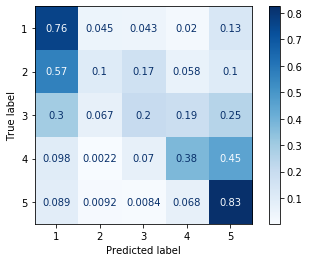

In [36]:
evaluate(imdb_svm, imdb_val_features, imdb_val_labels)

accuracy: 0.5708061002178649


array([5, 5, 5, ..., 1, 1, 1])

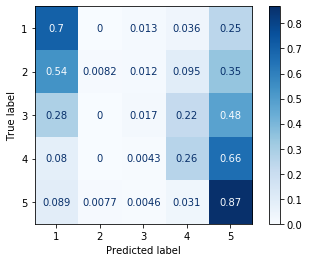

In [37]:
evaluate(imdb_nb, imdb_val_features, imdb_val_labels)

accuracy: 0.6292665214233841


array([5, 5, 5, ..., 1, 1, 1])

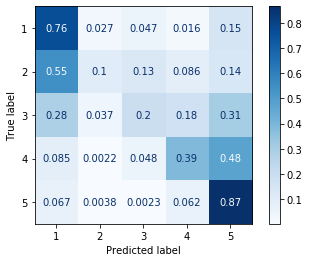

In [38]:
evaluate(imdb_lr, imdb_val_features, imdb_val_labels)

### Amazon Results

accuracy: 0.7543160690571049


array([5, 5, 5, ..., 1, 1, 5])

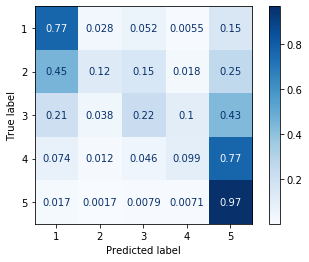

In [39]:
evaluate(amazon_svm, amazon_val_features, amazon_val_labels)

accuracy: 0.7205843293492696


array([5, 5, 5, ..., 1, 1, 5])

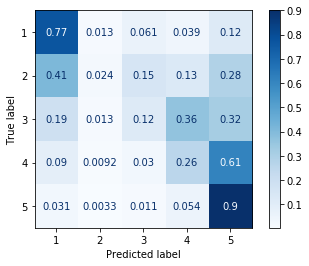

In [40]:
evaluate(amazon_nb, amazon_val_features, amazon_val_labels)

accuracy: 0.751660026560425


array([5, 5, 5, ..., 1, 4, 5])

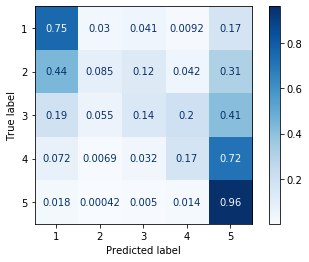

In [41]:
evaluate(amazon_lr, amazon_val_features, amazon_val_labels)

### Yelp Results

accuracy: 0.6177319587628866


array([5, 4, 5, ..., 4, 5, 5])

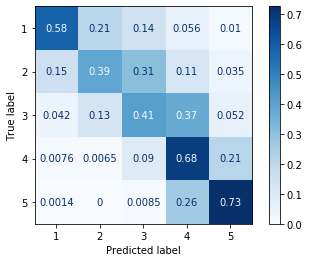

In [42]:
evaluate(yelp_svm, yelp_val_features, yelp_val_labels)

accuracy: 0.5657731958762887


array([4, 3, 4, ..., 4, 5, 5])

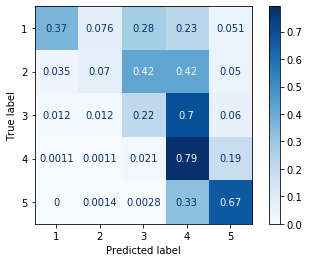

In [43]:
evaluate(yelp_nb, yelp_val_features, yelp_val_labels)

accuracy: 0.6202061855670103


array([4, 3, 5, ..., 4, 5, 5])

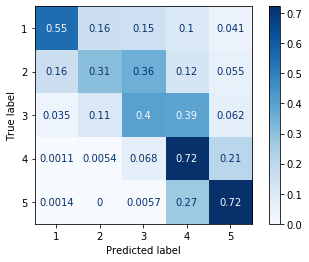

In [44]:
evaluate(yelp_lr, yelp_val_features, yelp_val_labels)

### Result Summary
|Model | IMDB | Amazon | Yelp |
| :----: | :----: | :----: | :----: |
| SVM | 60.89% | 75.43% | 61.77% |
| Naive Bayes | 57.08% | 72.06% | 56.58% |
| Logistic Regression | 62.92%  | 75.16% | 62.02% |

We can find that among the three models, the Logistic Regression model and Support Vector Machine model perform better than Naive Bayes model. Among three datasets, Amazon dataset performs better than IMDB dataset and Yelp dataset. 

## Result Analysis
We choose the best model and IMDB dataset to analyse the prediction.

accuracy: 0.6292665214233841


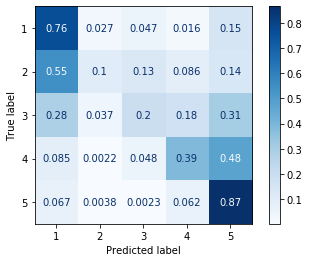

In [45]:
imdb_pred_labels = evaluate(imdb_lr, imdb_val_features, imdb_val_labels)

The result showed that 86% 1-star reviews and 86% 5-star reviews are predicted correctly. There are also some 2-star reviews being predicted as 1-star and some 3-star, 4-star reviews being predicted as 5-star. As when people give a rating in middle range, their wording might seems 'good' or 'bad', so these mispredictions are reasonable. However, there are 12% 2-star reviews which are predicted as 5-star. They deviate heavily from the true rating. So we tried to find these instances to figure out where the problem lies.

In [46]:
def get_t1p5(val_labels, pred_labels, val_data):
    true_label = set(np.where(val_labels == 1)[0])
    pred_label = set(np.where(pred_labels == 5)[0])
    index_list = true_label & pred_label
    T1P5 = list(index_list)
    t1p5_list = []
    for i in T1P5:
        t1p5_list.append(val_data[i])
        
    return t1p5_list

In [47]:
get_t1p5(imdb_val_labels, imdb_pred_labels, imdb_val_data)

[['Childish romantic view of common criminals; in no way equal to "Goodfella\'s" which really captures the truth about the underworld. The director must have been fantasizing about some imaginary Sicilian aristocracy (drinking too much vino), or simply mining a vein he knew would be commercially successful. There are excellent performances by Brando, Pacino and Caan among others, but the operatic excesses of the film make a mockery of reality. The individual performances are wasted. Not unlike "Apocalypse Now", "The Godfather" is an arrogant film with little genuine substance, and undermines an accurate understanding of the subject matter. It substitutes a yarn for a true story and, while it is entertaining, it contributes to the deterioration of our culture. Like the "Gladiator" it grabs your attention, then tells you lies. "The Godfather" is the cinematic equivalent of Baroque architecture, excessive, gaudy and not worth the work to create.',
  1],
 ['"The Godfather" was a sickening 

We picked several reviews which should be 1 score but only get 5 in prediction to analyse why the prediction is wrong, which will help us improve the model and feature extraction process in the future:

<img src="https://github.com/spencial/CMU_15688_Team_Project/raw/master/review_1.png" width = "400">

We can see that the wrongly predicted reviews all have some positive words like 'great', 'best' and some reviews even use irony, which is really hard for our model to detect the true underlying sentiment. We should consider more complex model such as bi-direction LSTM.

And we even find the review with replicated phrases in the dataset:

<img src="https://github.com/spencial/CMU_15688_Team_Project/raw/master/review_2.png" width = "400">

We should further clean the dataset more carefully to get rid of the above reviews.

## Apply IMDB model on Amazon and Yelp
We further use the IMDB model to predict rating scores on Amazon and Yelp dataset to see whether the IMDB model is general and can be expaned furth.

In [48]:
cross_amazon_train_features, cross_amazon_train_labels, cross_amazon_val_features, cross_amazon_val_labels = create_features(imdb_train_set, amazon_val_set)

In [49]:
cross_yelp_train_features, cross_yelp_train_labels, cross_yelp_val_features, cross_yelp_val_labels = create_features(imdb_train_set, yelp_val_set)

accuracy: 0.601593625498008


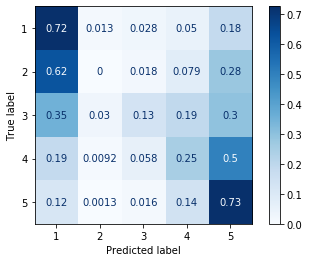

In [50]:
imdb_amazon = evaluate(imdb_lr, cross_amazon_val_features, cross_amazon_val_labels)

accuracy: 0.4329896907216495


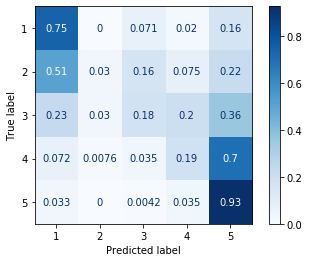

In [51]:
imdb_yelp = evaluate(imdb_lr, cross_yelp_val_features, cross_yelp_val_labels)

# Conclusion
By constructing and comparing different machine learning models, we found that the logistic regression model could get the accuracy of 62.92% on the IMDB dataset, 75.16% on the Amazon dataset, and 62.02% on the Yelp dataset. This shows that the trained logistic regression model can be applied to different websites to predict the score by analyzing the review text, so as to solve the problems raised by us. In addition, the data mining tools and data visualization tools we provide can be applied to most websites to obtain the information people need and carry out some analysis.

# Future works
1. Data Collection: get more data from IMDB, Amazon and Yelp website to make the model more general. More carefully clean the dataset to get rid of review with simple replicated words.
2. Feature Extraction: Use GPU to train deep learning models like bi-direction LSTM to extract the features or make prediction on the reviews.
3. Model: Hyperprameter tuning for the three models. And can try to train a general model on the combined three dataset.
4. Analysis: Pick more wrongly predicted data to review.

# Reference and Further Readings
* Code from Homework 1 and Homework 3
* [DavidRoldan523/amazon_reviews_allpages](https://github.com/DavidRoldan523/amazon_reviews_allpages/blob/master/scraper_amazon_threading_version.py)
* [Scraping the Web: A fast and simple way to scrape Amazon](https://medium.com/@tusharseth93/scraping-the-web-a-fast-and-simple-way-to-scrape-amazon-b3d6d74d649f)
* [Understanding Support Vector Machine algorithm from examples](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
* [Logistic Regression for Machine Learning](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
* [The Logistic Regression Algorithm](https://machinelearning-blog.com/2018/04/23/logistic-regression-101/)